### Задача 1 – Умножение матриц

Напишите функцию для умножения матриц, используя только списки и циклы.

Не забывайте проверить, что умножение выполнить возможно.
Напомним, что две матрицы могут быть перемножены, если число столбцов первой матрицы равно числу строк второй матрицы. Если матрица
$A$ имеет размер $m×n$ ($m$ строк и $nя$ столбцов), а матрица $B$ имеет размер $n×p$, то их произведение $C=AB$ будет иметь размер $m×p$.

Если $A=(a_{ij})$ — матрица размера $m×n$, а $B=(b_{jk})$ — матрица размера $n×p$, то элемент $c_{ik}$ матрицы $C=AB$ вычисляется по формуле:

$$c_{ik}=\sum_{j=1}^{n}a_{ij}b_{jk}$$

То есть каждый элемент новой матрицы является суммой произведений соответствующих элементов строки первой матрицы и столбца второй.

In [1]:
import numpy as np

matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

print("Произведение матриц:")
matrix1 @ matrix2

Произведение матриц:


array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

МОЙ КОД

In [2]:
def print_error(message):
    print(f"\033[91m{message}\033[0m")

def matrix_multiply(A, B):
    if len(A[0]) != len(B):
        print_error("По правилам, такие матрицы умножить нельзя")
        return None

    result = [[0] * len(B[0]) for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

def matrix(rows, cols):
    matrix = []
    print(f"Введите матрицу размером {rows}x{cols}:")
    for i in range(rows):
        while True:
            try:
                row = list(map(int, input(f"Введите элементы строки {i+1} через пробел: ").split()))
                if len(row) == cols:
                    matrix.append(row)
                    break
                else:
                    print_error(f"Ошибка: введите {cols} элементов!")
            except ValueError:
                print_error("Ошибка: вводите только целые числа!")
    return matrix

def positive(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print_error("Ошибка: введите положительное целое число.")
        except ValueError:
            print_error("Ошибка: вводите только целые числа!")

rows_A = positive("Введите количество строк матрицы A: ")
cols_A = positive("Введите количество столбцов матрицы A: ")
A = matrix(rows_A, cols_A)

rows_B = positive("Введите количество строк матрицы B: ")
cols_B = positive("Введите количество столбцов матрицы B: ")
B = matrix(rows_B, cols_B)

if A is not None and B is not None:
    result = matrix_multiply(A, B)
    if result:
        print("Результат умножения матриц:")
        for row in result:
            print(row)



Введите количество строк матрицы A: 1 2 3
Ошибка: вводите только целые числа!
Введите количество строк матрицы A: 1
Введите количество столбцов матрицы A: 1
Введите матрицу размером 1x1:
Введите элементы строки 1 через пробел: 2
Введите количество строк матрицы B: 1
Введите количество столбцов матрицы B: 1
Введите матрицу размером 1x1:
Введите элементы строки 1 через пробел: 2
Результат умножения матриц:
[4]


### Задача 2 – Функции

Дано две функции:

\begin{matrix} F(x) = a_{11}x^2 + a_{12}x + a_{13}&(1) \\ P(x) = a_{21}x^2+a_{22}x + a_{23} &(2) \end{matrix}
​
* На вход программа должна принимать 2 строки. Каждая строка содержит 3 действительных числа через пробел: коэффициенты $a$.
* Необходимо найти точки экстремума функций (например, через функцию [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), [`fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) и др.) и определить, есть ли у функций общие решения при введенных коэффициентах на некотором диапазоне значений $x$, предусмотрев ситуации, когда решения есть, решений нет и решений бесконечно много.


МОЙ КОД

Введите коэффициенты a11, a12, a13 для F(x): 1 2 2
Введите коэффициенты a21, a22, a23 для P(x): 4 5 1


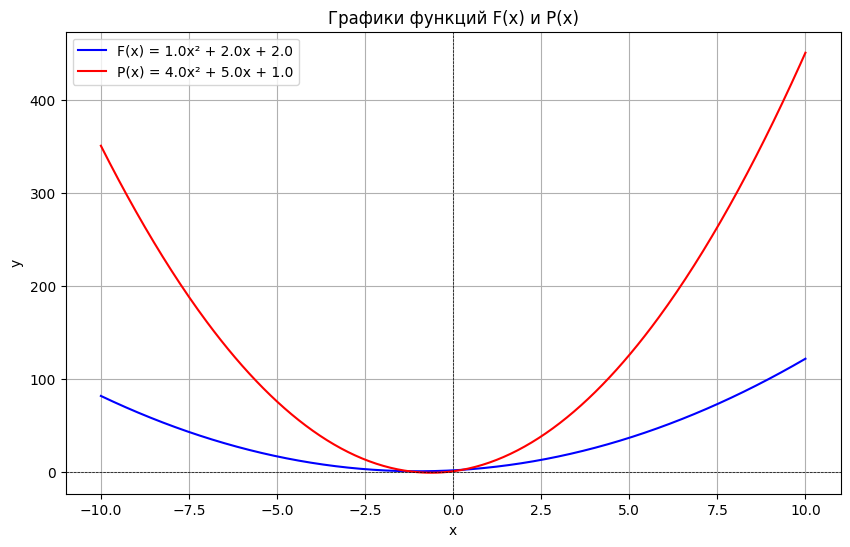

Экстремум F(x): x = -1.0000000000000002, F(x) = 1.0
Экстремум P(x): x = -0.6250000000000001, P(x) = -0.5624999999999998
Общие решения: [-1.2637626158259734, 0.2637626158259733]


In [4]:
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

def print_error(message):
    print(f"\033[91m{message}\033[0m")

def F(x, a11, a12, a13):
    return a11 * x**2 + a12 * x + a13

def P(x, a21, a22, a23):
    return a21 * x**2 + a22 * x + a23

def ext_F(a11, a12, a13):
    result = minimize_scalar(lambda x: F(x, a11, a12, a13))
    return result.x, result.fun

def ext_P(a21, a22, a23):
    result = minimize_scalar(lambda x: P(x, a21, a22, a23))
    return result.x, result.fun


def solutions(a11, a12, a13, a21, a22, a23):
    # (a11 - a21)x^2 + (a12 - a22)x + (a13 - a23) = 0
    b1 = a11 - a21
    b2 = a12 - a22
    b3 = a13 - a23

    discriminant = b2**2 - 4 * b1 * b3

    if b1 == 0 and b2 == 0:
        if b3 == 0:
            return "Бесконечно много решений"
        else:
            return "Решений нет"
    elif discriminant < 0:
        return "Решений нет"
    elif discriminant == 0:
        x = -b2 / (2 * b1)
        return [x]
    else:
        x1 = (-b2 + np.sqrt(discriminant)) / (2 * b1)
        x2 = (-b2 - np.sqrt(discriminant)) / (2 * b1)
        return [x1, x2]


def right_coefficients(prompt):
    while True:
        try:
            values = input(prompt).strip().split()
            if len(values) != 3:
                print_error("Ошибка: необходимо ввести ровно 3 коэффициента.")
                continue
            coefficients = list(map(float, values))
            return coefficients
        except ValueError:
            print_error("Ошибка: все коэффициенты должны быть действительными числами.")

def plot(a11, a12, a13, a21, a22, a23):
    x = np.linspace(-10, 10, 400)
    y_F = F(x, a11, a12, a13)
    y_P = P(x, a21, a22, a23)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y_F, label=f'F(x) = {a11}x² + {a12}x + {a13}', color='blue')
    plt.plot(x, y_P, label=f'P(x) = {a21}x² + {a22}x + {a23}', color='red')

    plt.title('Графики функций F(x) и P(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()



a11, a12, a13 = right_coefficients("Введите коэффициенты a11, a12, a13 для F(x): ")

a21, a22, a23 = right_coefficients("Введите коэффициенты a21, a22, a23 для P(x): ")

plot(a11, a12, a13, a21, a22, a23)

extremum_F = ext_F(a11, a12, a13)
extremum_P = ext_P(a21, a22, a23)

print(f"Экстремум F(x): x = {extremum_F[0]}, F(x) = {extremum_F[1]}")
print(f"Экстремум P(x): x = {extremum_P[0]}, P(x) = {extremum_P[1]}")

solution = solutions(a11, a12, a13, a21, a22, a23)
print("Общие решения:", solution)


### Задача 3 – Коэффициент асимметрии и эксцесса

Напишите функцию, которая для случайной выборки рассчитывает коэффициенты асимметрии и эксцесса.

Коэффициент асимметрии:

$$A_3=\frac{m_3}{\sigma^3}$$

Коэффициент эксцесса:

$$E_4=\frac{m_4}{\sigma^4}-3$$

С помощью этих коэффициентов можно прикинуть, насколько близко распределение выборки к нормальному. Для расчета этих коэффициентов понадобится рассчитать центральные моменты третьего ($m_3$) и четвертого ($m_4$) порядка. Основные формулы, которые понадобятся для расчетов:
1. Момент второго порядка (он же – дисперсия):
$$m_2=D_e=\frac{∑(x_i-\overline{x_e})^2\times n_i}{n}$$
2. Момент третьего порядка:
$$m_3=\frac{∑(x_i-\overline{x_e})^3\times n_i}{n}$$
3. Момент четвертого порядка:
$$m_4=\frac{∑(x_i-\overline{x_e})^4\times n_i}{n}$$

В формулах выше $\overline{x_e}$ – это выборочное среднее.
$$\overline{x_e}=\frac{∑(x_i\times n_i)}{n},$$
где $x_i$ – $i$-е значение из выборки, $n_i$ – число раз, когда $x_i$ встретилось в выборке, $n$ – объем выборки.


Проверить корректность расчетов можно с помощью функции [`kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) для коэффициента эксцесса и функции [`skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) из `scipy`.

**Коэффициент асимметрии** количественно определяет степень асимметрии распределения. Он показывает, в какую сторону распределение скошено относительно своего среднего значения.

1. Если коэффициент асимметрии больше 0, это означает, что "длинная часть" распределения находится справа от среднего (правостороннее распределение). Это может указывать на наличие выбросов или значений, превышающих среднее.
2. Если коэффициент меньше 0, "длинная часть" находится слева от среднего (левостороннее распределение). Это может свидетельствовать о большем количестве низких значений.
3. Коэффициент равен 0, что указывает на симметрию вокруг среднего значения.



**Эксцесс** измеряет остроту распределения по сравнению с нормальным распределением и показывает, насколько вероятны выбросы в данных.

1. Если эксцесс положителен (больше 0), это указывает на более острый пик и более тяжелые хвосты по сравнению с нормальным распределением. Это означает, что в данных больше выбросов.
2. Если эксцесс равен 0, это соответствует нормальному распределению, где пики и хвосты находятся на стандартном уровне.
3. Если эксцесс отрицателен (меньше 0), это говорит о более плоском пике и легких хвостах, что указывает на меньшую вероятность выбросов.

In [5]:
from scipy.stats import kurtosis, skew

In [6]:
kurtosis([2,3,5,7,8]), skew([2,3,5,7,8])

(-1.56508875739645, 0.0)

In [7]:
kurtosis([2,3,2,5,7,2,2,8]), skew([2,3,2,5,7,2,2,8])

(-1.1002728454980493, 0.7565586244407938)

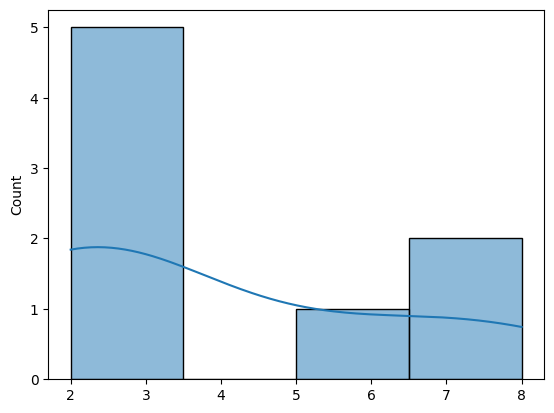

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([2,3,2,5,7,2,2,8], kde=True);

МОЙ КОД

In [16]:
import numpy as np
from scipy.stats import skew, kurtosis

def print_error(message):
    print(f"\033[91m{message}\033[0m")

def inputt():
    values = []
    freq = []

    while not values:
        try:
            values_input = input("Введите значения через пробел: ").strip().split()
            values = [float(v) for v in values_input]
        except ValueError:
            print_error("Ошибка: Все введенные значения должны быть числами.")

    while not freq:
        try:
            freq_input = input("Введите соответствующие частоты через пробел: ").strip().split()
            freq = [int(f) for f in freq_input]

            if len(values) != len(freq):
                print_error("Ошибка: Количество значений и частот должно совпадать.")
                freq = []
            elif any(f <= 0 for f in freq):
                print_error("Ошибка: Частоты должны быть положительными числами.")
                freq = []
        except ValueError:
            print_error("Ошибка: Все введенные частоты должны быть числами.")

    return values, freq

def skew_kurtosis(values, freq):
    values = np.array(values)
    freq = np.array(freq)
    n = np.sum(freq)
    xe = np.sum(values * freq) / n

    m2 = np.sum(freq * (values - xe)**2) / n
    m3 = np.sum(freq * (values - xe)**3) / n
    m4 = np.sum(freq * (values - xe)**4) / n

    skew = m3 / m2**(3/2)
    kurtosis = m4 / m2**2 - 3


    return {
        "mean": xe,
        "skew": skew,
        "kurtosis": kurtosis
    }


print("Введите данные для анализа распределения.")
values, freq = inputt()
result = skew_kurtosis(values, freq)

print(f"Выборочное среднее: {result['mean']}")
print(f"Коэффициент асимметрии (расчет): {result['skew']}")
print(f"Коэффициент эксцесса (расчет): {result['kurtosis']}")


Введите данные для анализа распределения.
Введите значения через пробел: 1 2 3 4
Введите соответствующие частоты через пробел: 1 1 1 1
Выборочное среднее: 2.5
Коэффициент асимметрии (расчет): 0.0
Коэффициент эксцесса (расчет): -1.36


Проверка


In [18]:
kurtosis(values),skew(values)

(-1.36, 0.0)

### Куда и как сдавать работу?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**